In [6]:
import numpy as np
from scipy.linalg import eigh,sqrtm
import matplotlib.pyplot as plt
from tqdm import tqdm



def simul_iter(N,n,var,theta):
    u=np.random.randn(N)[:,None]
    u=u/np.linalg.norm(u)
    X=np.random.randn(N,n)
    Rh=sqrtm(var*(np.eye(N)+theta*(u@(u.T))))
    Rhx=Rh@X/np.sqrt(n)
    emp_cov=Rhx.T@Rhx
    return eigh(emp_cov,eigvals_only=True,subset_by_index=[n-1,n-1])

var=1
c1,theta1=2,1
c2,theta2=2,3
noise=0
nmax=np.log10(2500)

def simul(var,c,theta,noise):
    vals,ns=np.zeros((20,5)),[]
    for i,n in enumerate(tqdm(np.logspace(1,nmax,20))):
        n=int(n)
        ns.append(n)
        N=int(n*c+1/n*noise)
        for j in range(5):
            vals[i,j]=simul_iter(N,n,var,theta)
    return ns,vals

#ns,vals1=simul(var,c1,theta1,0)
ns,vals2=simul(var,c2,theta2,0)

#if theta<=np.sqrt(c): cvg=var*((1+np.sqrt(c))**2)
#else: cvg=var*(1+theta)*(1+c/theta)

    


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [13:11<00:00, 39.58s/it]


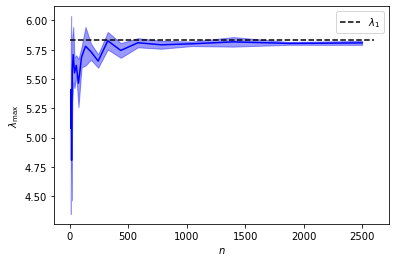

In [24]:
def lim(theta,c):
    if theta<=np.sqrt(c): cvg=var*((1+np.sqrt(c))**2)
    else: cvg=var*(1+theta)*(1+c/theta)
    return cvg

vals=vals1
cvg=lim(theta1,c1)
#label='$\sigma^2(1+\sqrt{c})^2$'
#label='$\sigma^2(1+ \theta )(1+\frac{c}{\theta})$'
label='$\lambda_1$'
mu=vals.mean(axis=1)
std=vals.std(axis=1)

b1,b2=mu-std,mu+std
#b1,b2=vals.min(axis=1),vals.max(axis=1)





plt.hlines(cvg,0,10**nmax+100,linestyles='dashed',label=label)

plt.gca().set_xlabel('$n$')
plt.gca().set_ylabel('$\lambda_{\max}$')

plt.plot(ns,mu,c='b')
plt.fill_between(ns,b1,b2,color='b',alpha=0.4)
plt.legend()